Comparing Contacts Binaries in PHOEBE 2 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed and manually install the python wrappers in the `phoebe-py` directory.

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)
b['q'] = 0.7

Adding Datasets and Compute Options
--------------------

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 39 parameters | contexts: dataset, compute, constraint, figure>

Now we add compute options for the 'legacy' backend.

In [4]:
b.add_compute('legacy')

<ParameterSet: 19 parameters | datasets: _default, lc01, rv01>

Let's use the external atmospheres available for both phoebe1 and phoebe2

In [5]:
b.set_value_all('atm', 'extern_planckint')

Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@lc01 or use a backend that supports atm='ck2004'.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@rv01 or use a backend that supports atm='ck2004'.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@secondary@lc01 or use a backend that supports atm='ck2004'.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute

Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@rv01 or use a backend that supports atm='ck2004'.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@secondary@phoebe01 or ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@secondary@lc01 or use a backend that supports atm='ck2004'.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@secondary@phoebe01 

Set value of gridsize for the trapezoidal (WD) mesh.

In [6]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [7]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

b.set_value_all('rv_grav', False)
b.set_value_all('ltte', False)

Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@lc01 or use a backend that supports atm='ck2004'.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe01 or ld_mode@primary@rv01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 11 Dec 2019 14:20 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@rv01 or use a backend that suppor

Finally, let's compute our models

In [8]:
b.run_compute(kind='phoebe', model='phoebe2model', irrad_method='none')

<ParameterSet: 8 parameters | contexts: model, figure>

In [9]:
b.run_compute(kind='legacy', model='phoebe1model', irrad_method='none')

Wed, 11 Dec 2019 14:20 BUNDLE       WARNING legacy does not natively support interpolating ld coefficients.  These will be interpolated by PHOEBE 2 and then passed to legacy.
Wed, 11 Dec 2019 14:20 IO           WARNING requiv_max@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING requiv_min@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING logg@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING freq@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING pitch@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING yaw@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING long_an@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING irrad_frac_lost_bol@primary@star@component has no phoebe 1 corollary
Wed, 11 Dec

Wed, 11 Dec 2019 14:20 IO           WARNING rv_method@secondary@rv01@legacy01@legacy@compute has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING t0@system has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING ra@system has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING dec@system has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING distance@system has no phoebe 1 corollary
Wed, 11 Dec 2019 14:20 IO           WARNING hierarchy@system has no phoebe 1 corollary


<ParameterSet: 8 parameters | contexts: model, figure>

Plotting
-------------------------

### Light Curve

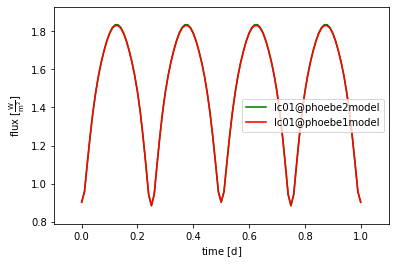

In [10]:
afig, mplfig = b.filter(dataset='lc01').plot(c={'phoebe2model': 'g', 'phoebe1model': 'r'}, linestyle='solid', 
                                             legend=True, show=True)

Now let's plot the residuals between these two models

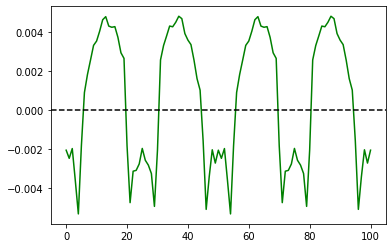

In [11]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebe2model') - b.get_value('fluxes@lc01@phoebe1model'), 'g-')
artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

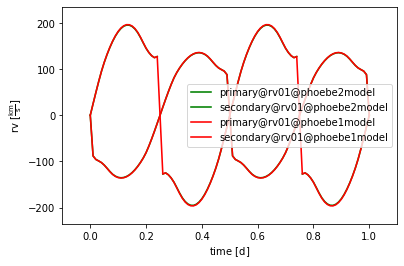

In [12]:
afig, mplfig = b['rv01'].plot(c={'phoebe2model': 'g', 'phoebe1model': 'r'}, linestyle='solid', 
                              legend=True, show=True)

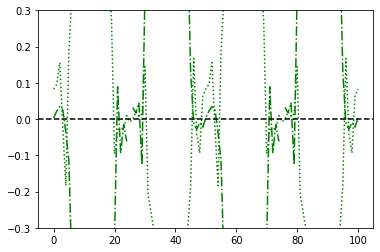

In [13]:
artist, = plt.plot(b.get_value('rvs@primary@phoebe2model', ) - b.get_value('rvs@primary@phoebe1model'), color='g', ls=':')
artist, = plt.plot(b.get_value('rvs@secondary@phoebe2model') - b.get_value('rvs@secondary@phoebe1model'), color='g', ls='-.')
artist = plt.axhline(0.0, linestyle='dashed', color='k')
ylim = plt.ylim(-0.3, 0.3)